## Credit Card Fraud Detection

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

plt.rcParams['figure.figsize'] = (15, 10)

import warnings
warnings.filterwarnings("ignore")

C:\Anaconda_latest\envs\creditcardfrauddetection\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('fraudTrain.csv')

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
df['trans_num']

0          0b242abb623afc578575680df30655b9
1          1f76529f8574734946361c461b024d99
2          a1a22d70485983eac12b5b88dad1cf95
3          6b849c168bdad6f867558c3793159a81
4          a41d7549acf90789359a9aa5346dcb46
                         ...               
1296670    440b587732da4dc1a6395aba5fb41669
1296671    278000d2e0d2277d1de2f890067dcc0a
1296672    483f52fe67fabef353d552c1e662974c
1296673    d667cdcbadaaed3da3f4020e83591c83
1296674    8f7c8e4ab7f25875d753b422917c98c9
Name: trans_num, Length: 1296675, dtype: object

In [8]:
# Dropping columns that are not important
drop_columns = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last',
               'street', 'zip', 'job', 'dob', 'trans_num', 'unix_time']
df.drop(drop_columns, axis = 1, inplace = True)

In [10]:
df.head()

,category,amt,gender,city,state,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,36.011293,-82.048315,0
1,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,49.159047,-118.186462,0
2,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,43.150704,-112.154481,0
3,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,47.034331,-112.561071,0
4,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,38.674999,-78.632459,0


In [12]:
df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1296675 non-null  object 
 1   amt         1296675 non-null  float64
 2   gender      1296675 non-null  object 
 3   city        1296675 non-null  object 
 4   state       1296675 non-null  object 
 5   lat         1296675 non-null  float64
 6   long        1296675 non-null  float64
 7   city_pop    1296675 non-null  int64  
 8   merch_lat   1296675 non-null  float64
 9   merch_long  1296675 non-null  float64
 10  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 108.8+ MB


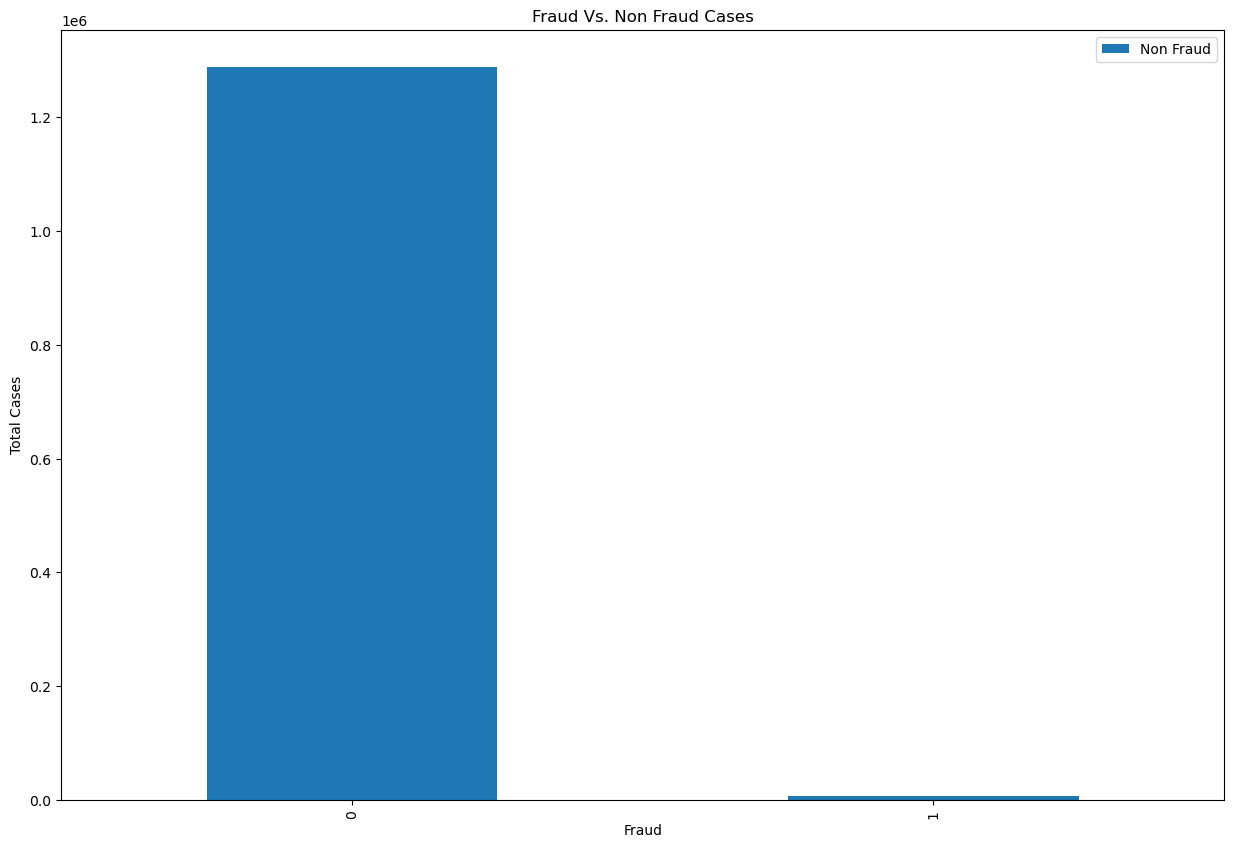

In [14]:
df['is_fraud'].value_counts().plot(kind = 'bar')
plt.title("Fraud Vs. Non Fraud Cases")
plt.xlabel("Fraud")
plt.ylabel("Total Cases")
plt.legend(['Non Fraud', 'Fraud'])
plt.show()

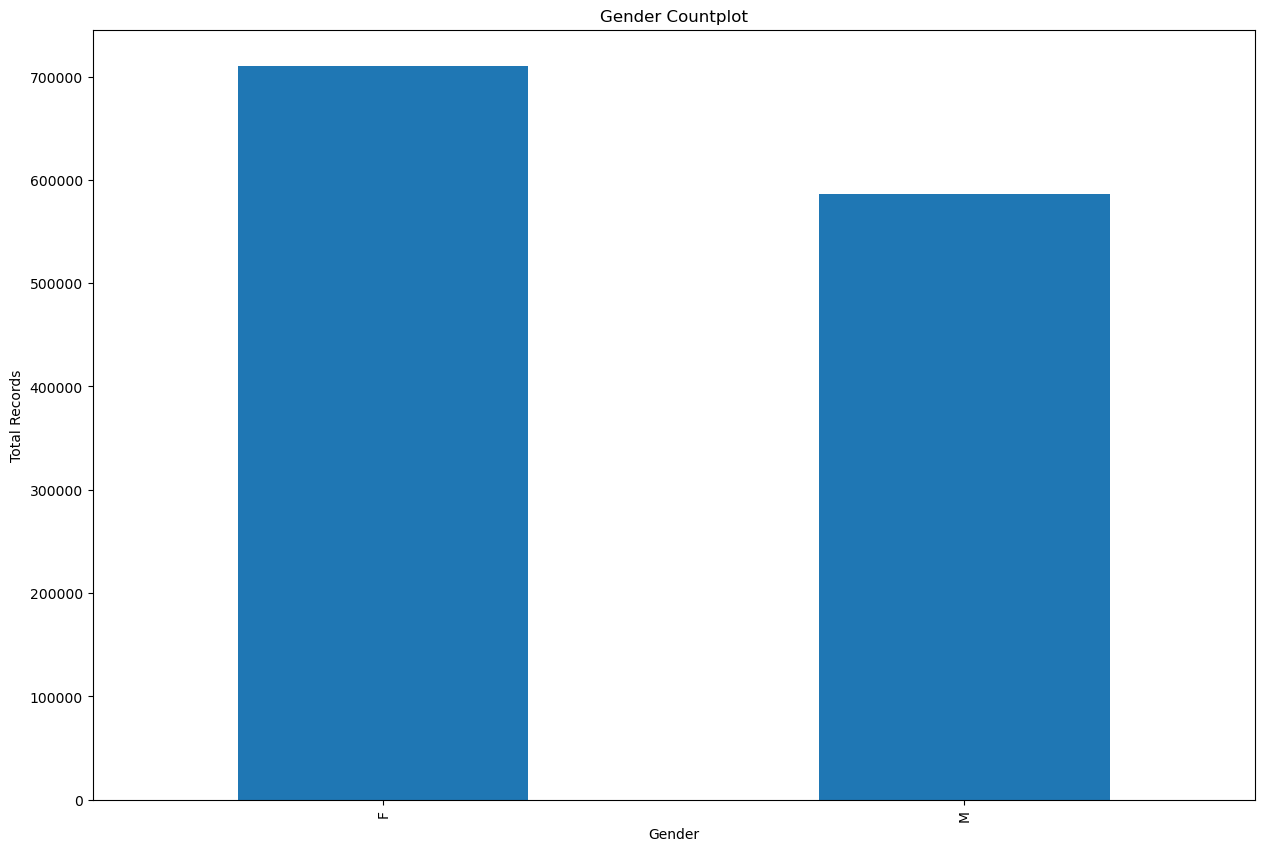

In [28]:
df['gender'].value_counts().plot(kind = 'bar')
plt.title("Gender Countplot")
plt.xlabel("Gender")
plt.ylabel("Total Records")
plt.show()

In [15]:
X = df.drop(['is_fraud'], axis = 1)
y = df['is_fraud'].values.reshape(-1, 1)

In [16]:
print("The shape of the input data: {}".format(X.shape))
print("The shape of the output data: {}".format(y.shape))

The shape of the input data: (1296675, 10)
The shape of the output data: (1296675, 1)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101,
                                                   stratify = y)

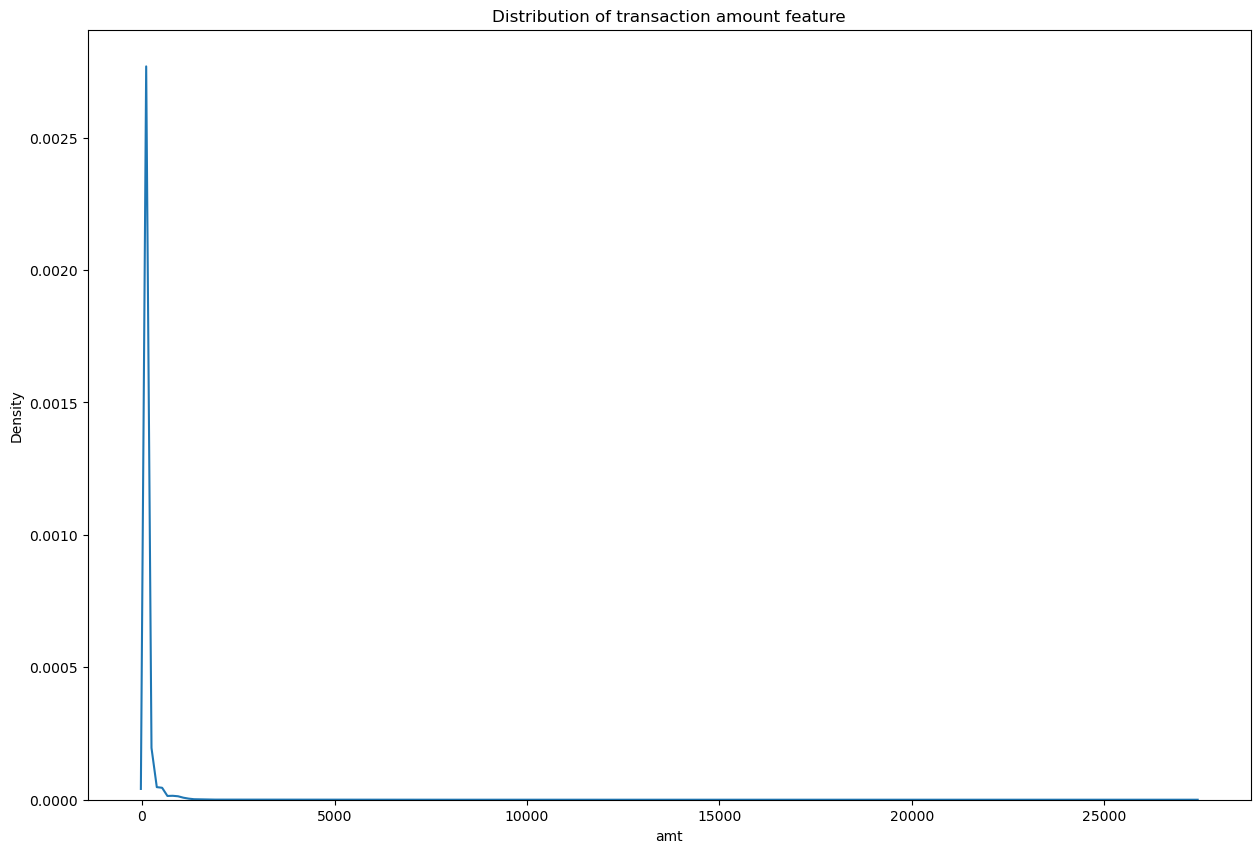

In [19]:
sns.kdeplot(X_train['amt'])
plt.title("Distribution of transaction amount feature")
plt.show()

In [20]:
fraud_cases = df[df['is_fraud'] == 1]
non_fraud_cases = df[df['is_fraud'] == 0]

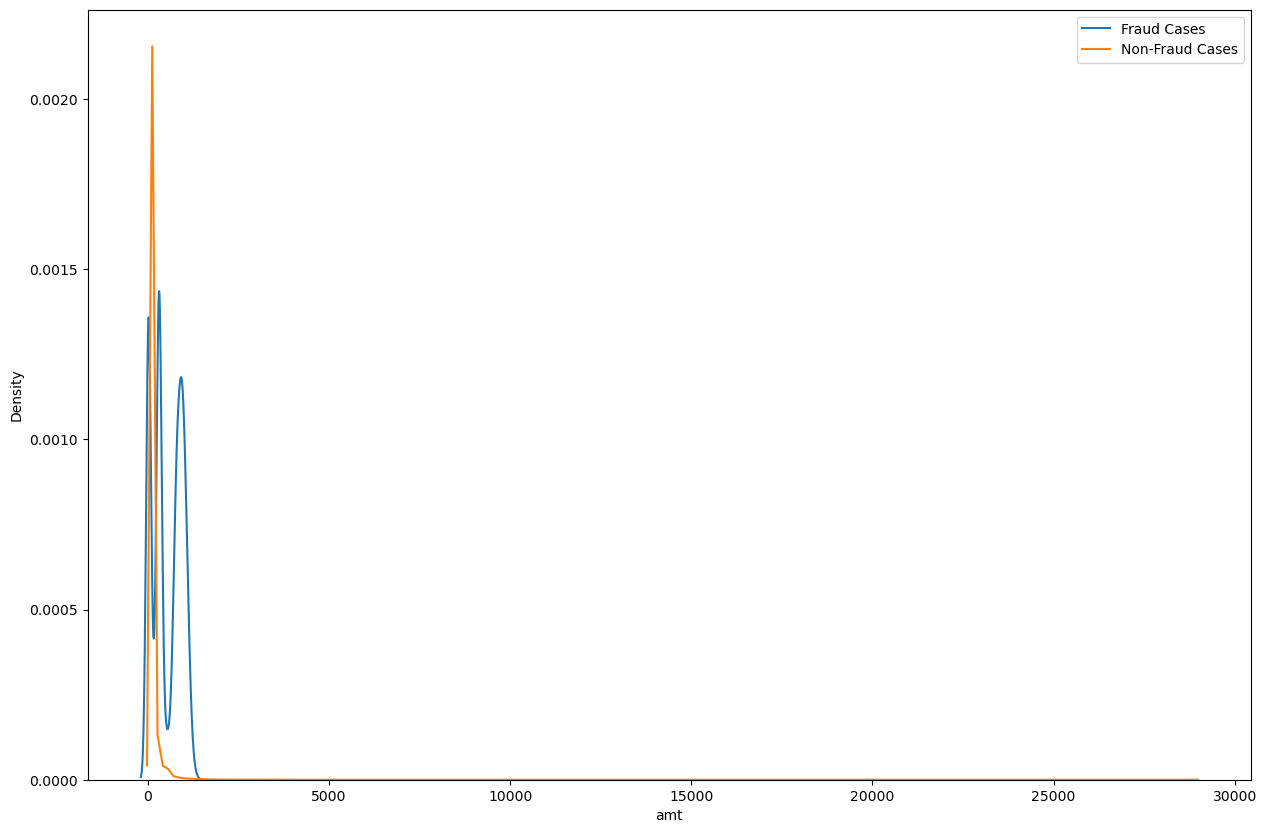

In [21]:
sns.kdeplot(fraud_cases['amt'], label = "Fraud Cases")
sns.kdeplot(non_fraud_cases['amt'], label = "Non-Fraud Cases")
plt.legend()
plt.show()

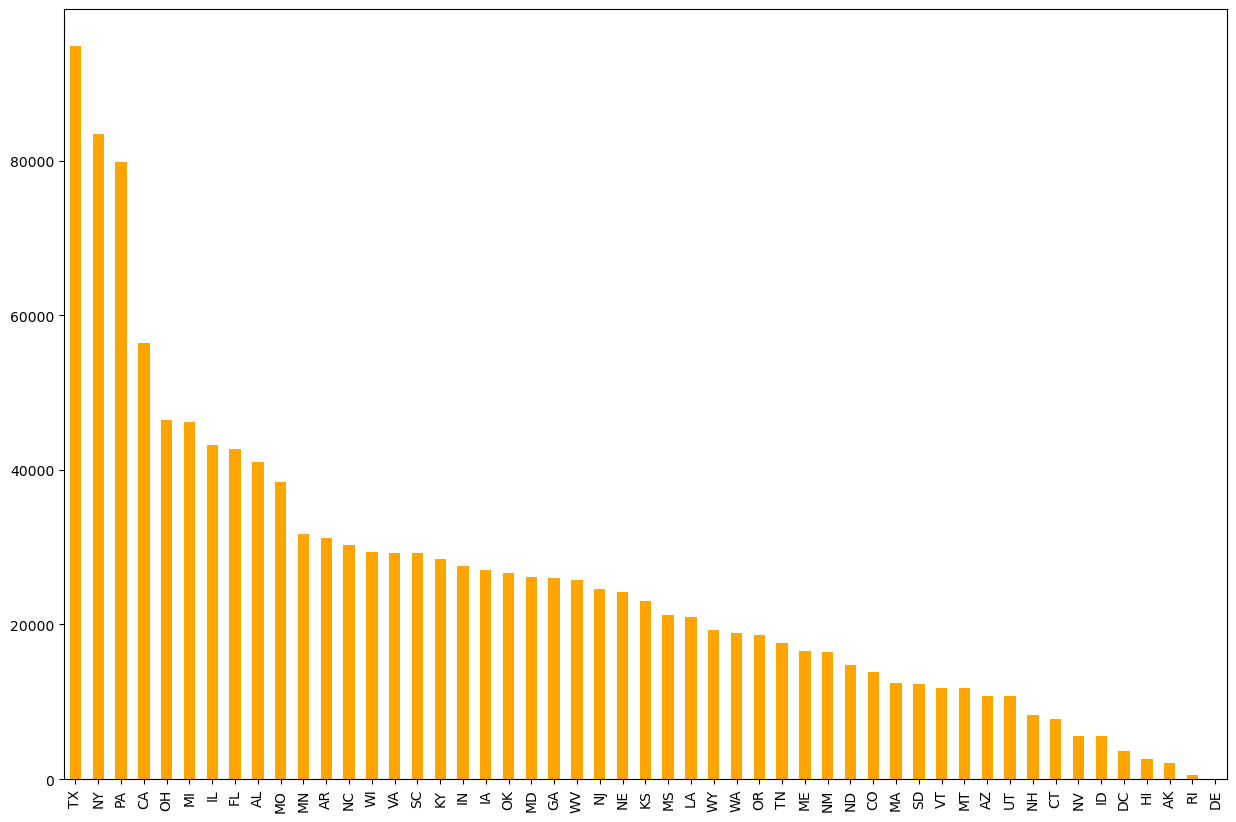

In [33]:
df['state'].value_counts().plot(kind = 'bar', color = 'orange')
plt.show()

<AxesSubplot: >

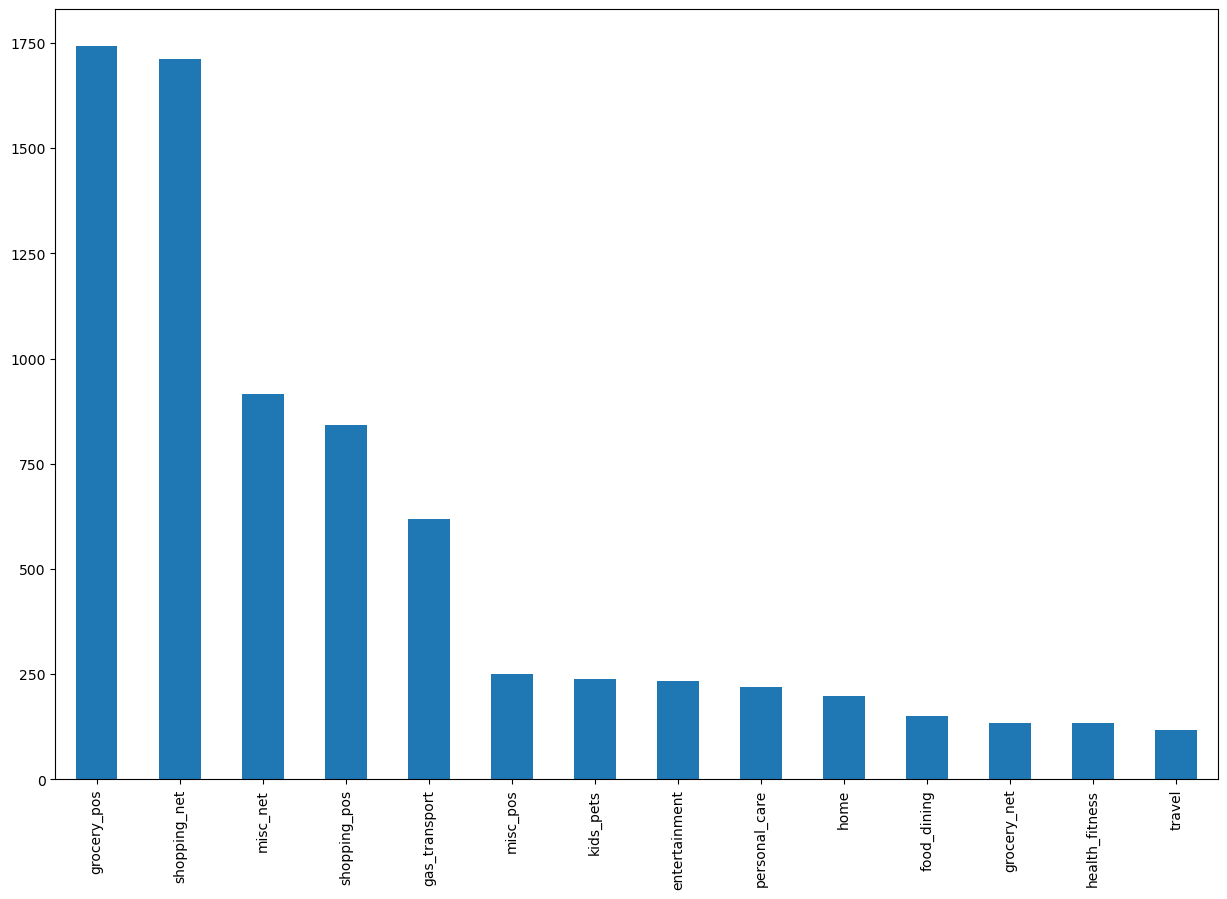

In [23]:
fraud_cases['category'].value_counts().plot(kind = 'bar')

<AxesSubplot: >

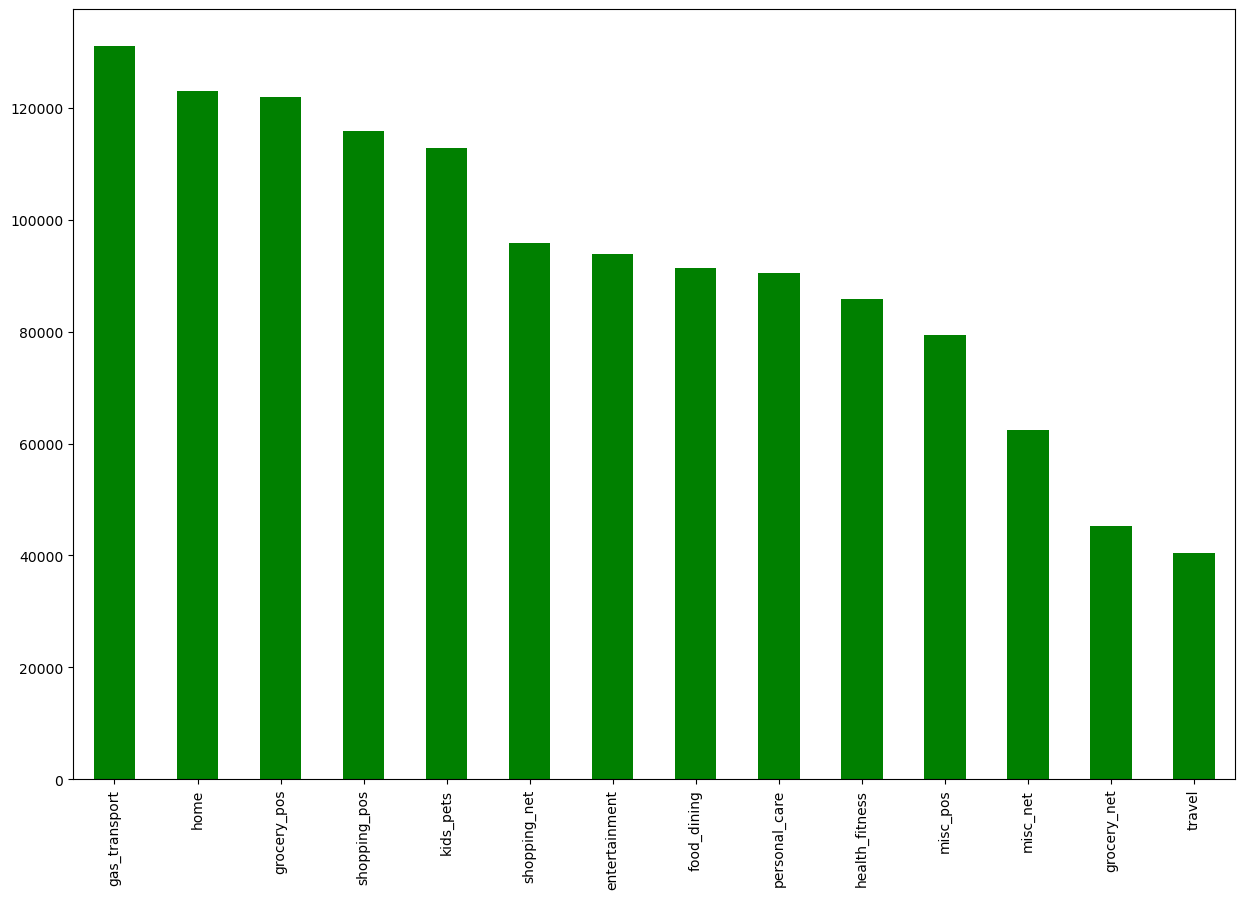

In [30]:
non_fraud_cases['category'].value_counts().plot(kind = 'bar', color = 'green')

<AxesSubplot: >

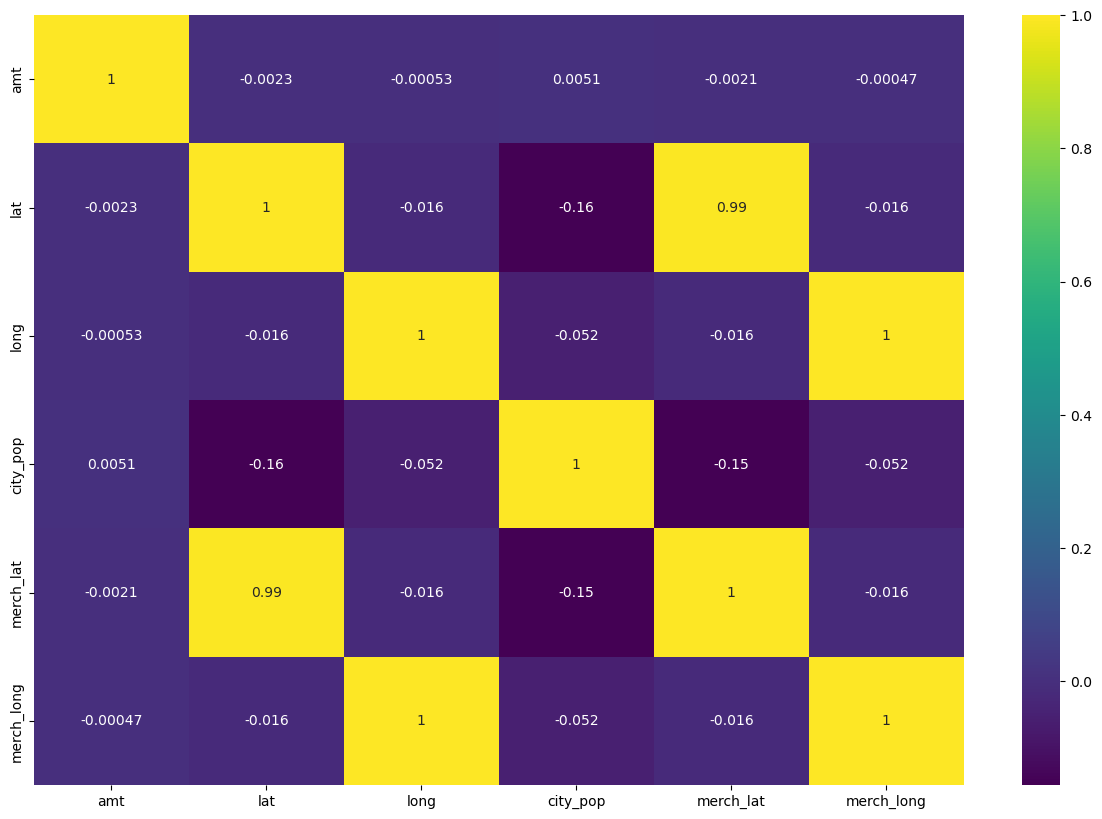

In [25]:
sns.heatmap(X_train.corr(), annot = True, cmap = 'viridis')

<AxesSubplot: >

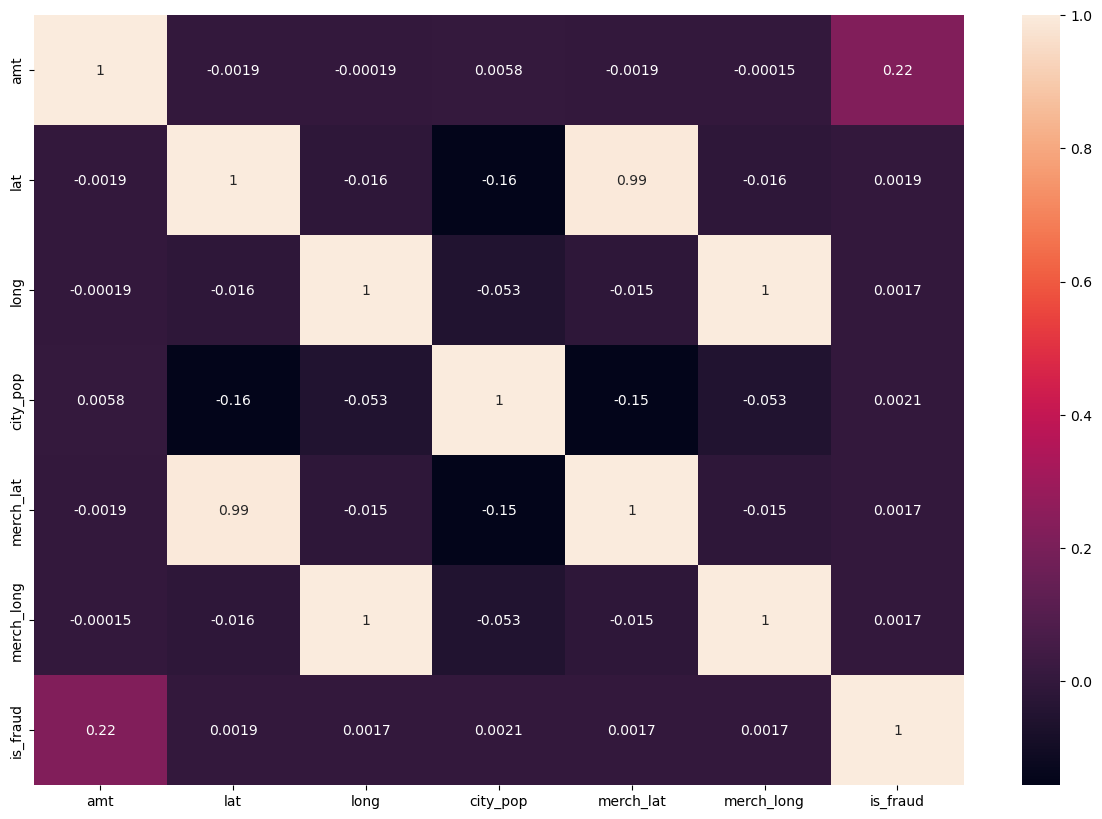

In [27]:
sns.heatmap(df.corr(), annot = True)

### Feature Engineering

### Training an ML Model

In [31]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
X_train_dropped = X_train.drop(['is_fraud'], axis = 1)
X_test_dropped = X_test.drop(['is_fraud'], axis = 1)

KeyError: "['is_fraud'] not found in axis"

In [82]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_dropped, y_train)

[11:12:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
X_test.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
902092,5.678337,5.217001,6.063064,1.0,0.0,0.0,1.0
466758,53.338851,0.246248,0.863431,1.0,1.0,0.0,1.0
653474,2.019088,0.057677,0.819675,1.0,0.0,0.0,1.0
488200,5.618768,0.166979,6.216503,1.0,0.0,0.0,0.0
673306,1.060857,5.847861,1.368737,0.0,0.0,0.0,1.0


In [84]:
y_predictions = xgb_model.predict(X_test_dropped)

In [85]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    273779
         1.0       1.00      0.28      0.44     26221

    accuracy                           0.94    300000
   macro avg       0.97      0.64      0.70    300000
weighted avg       0.94      0.94      0.92    300000



In [86]:
confusion_matrix(y_test, y_predictions)

array([[273770,      9],
       [ 18777,   7444]], dtype=int64)

### Feature Importance

In [87]:
import shap

In [88]:
explainer = shap.Explainer(xgb_model)

In [89]:
explainer

In [91]:
shap_values = explainer(X_train_dropped)

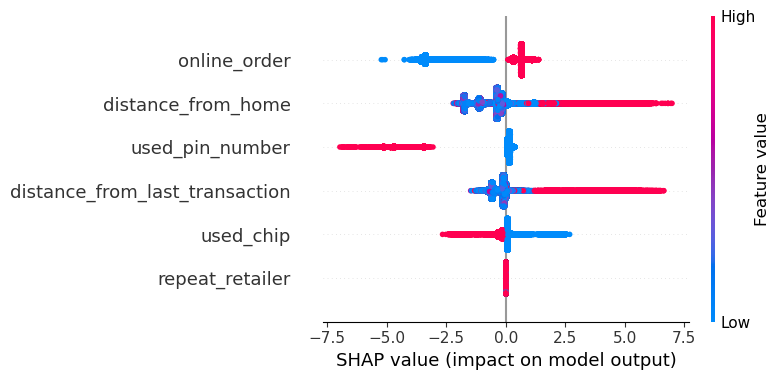

In [92]:
shap.summary_plot(shap_values, X_train_dropped)

<AxesSubplot: xlabel='ratio_to_median_purchase_price', ylabel='Density'>

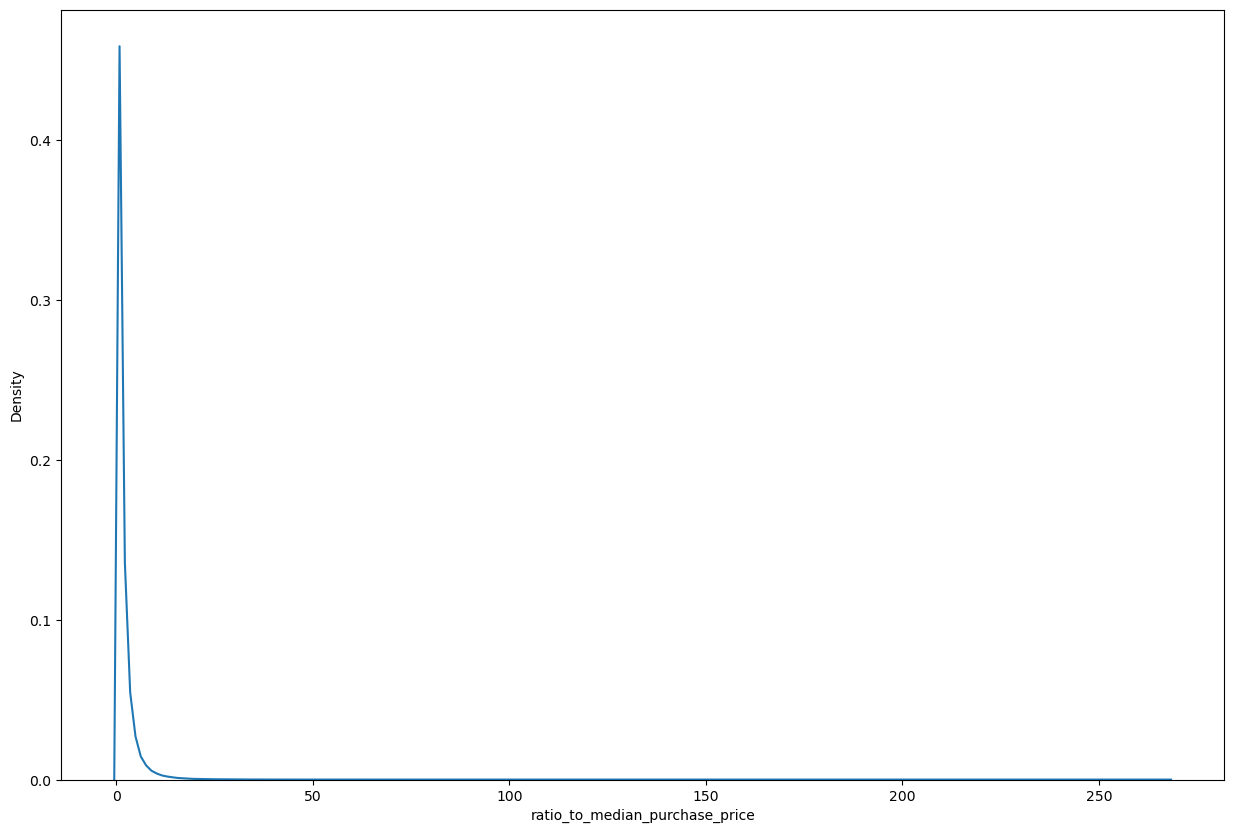

In [93]:
sns.kdeplot(X_train['ratio_to_median_purchase_price'])

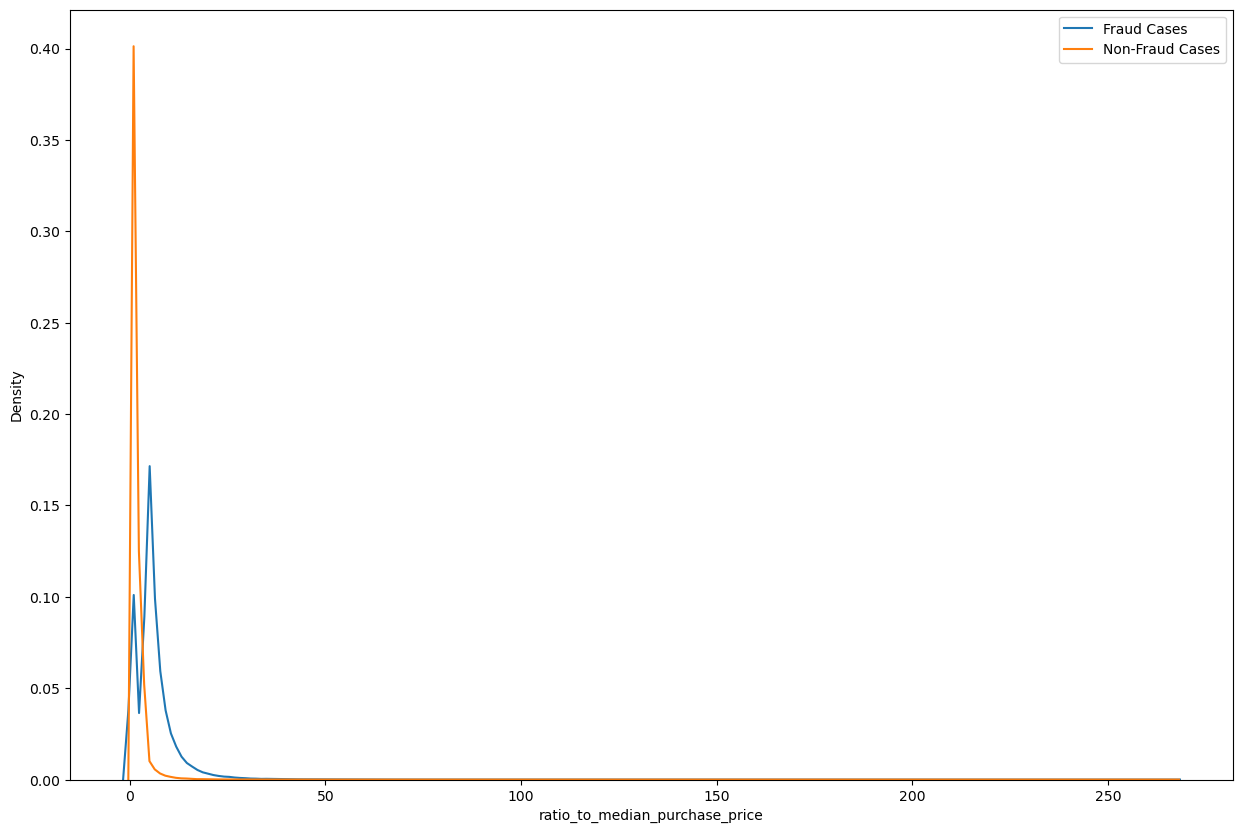

In [94]:
sns.kdeplot(fraud_cases['ratio_to_median_purchase_price'], label = "Fraud Cases")
sns.kdeplot(non_fraud_cases['ratio_to_median_purchase_price'], label = "Non-Fraud Cases")
plt.legend()
plt.show()

### Training an ML Model with Feature Engineering

### Scaling

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
X_train.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
74182,7.000075,16.595474,0.664250,1.0,0.0,0.0,1.0
196318,1.477599,0.071672,2.424212,0.0,1.0,0.0,0.0
925685,4.515377,1.795108,0.116781,1.0,0.0,0.0,1.0
728002,10.586309,0.229630,3.049301,1.0,0.0,1.0,1.0
875280,17.360498,0.088579,0.267554,1.0,0.0,0.0,0.0


In [97]:
X_test.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
902092,5.678337,5.217001,6.063064,1.0,0.0,0.0,1.0
466758,53.338851,0.246248,0.863431,1.0,1.0,0.0,1.0
653474,2.019088,0.057677,0.819675,1.0,0.0,0.0,1.0
488200,5.618768,0.166979,6.216503,1.0,0.0,0.0,0.0
673306,1.060857,5.847861,1.368737,0.0,0.0,0.0,1.0


In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dropped)
X_test_scaled = scaler.transform(X_test_dropped)

In [99]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

[11:15:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
y_predictions = xgb_model.predict(X_test_scaled)

In [101]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    273779
         1.0       1.00      0.28      0.44     26221

    accuracy                           0.94    300000
   macro avg       0.97      0.64      0.70    300000
weighted avg       0.94      0.94      0.92    300000



<AxesSubplot: >

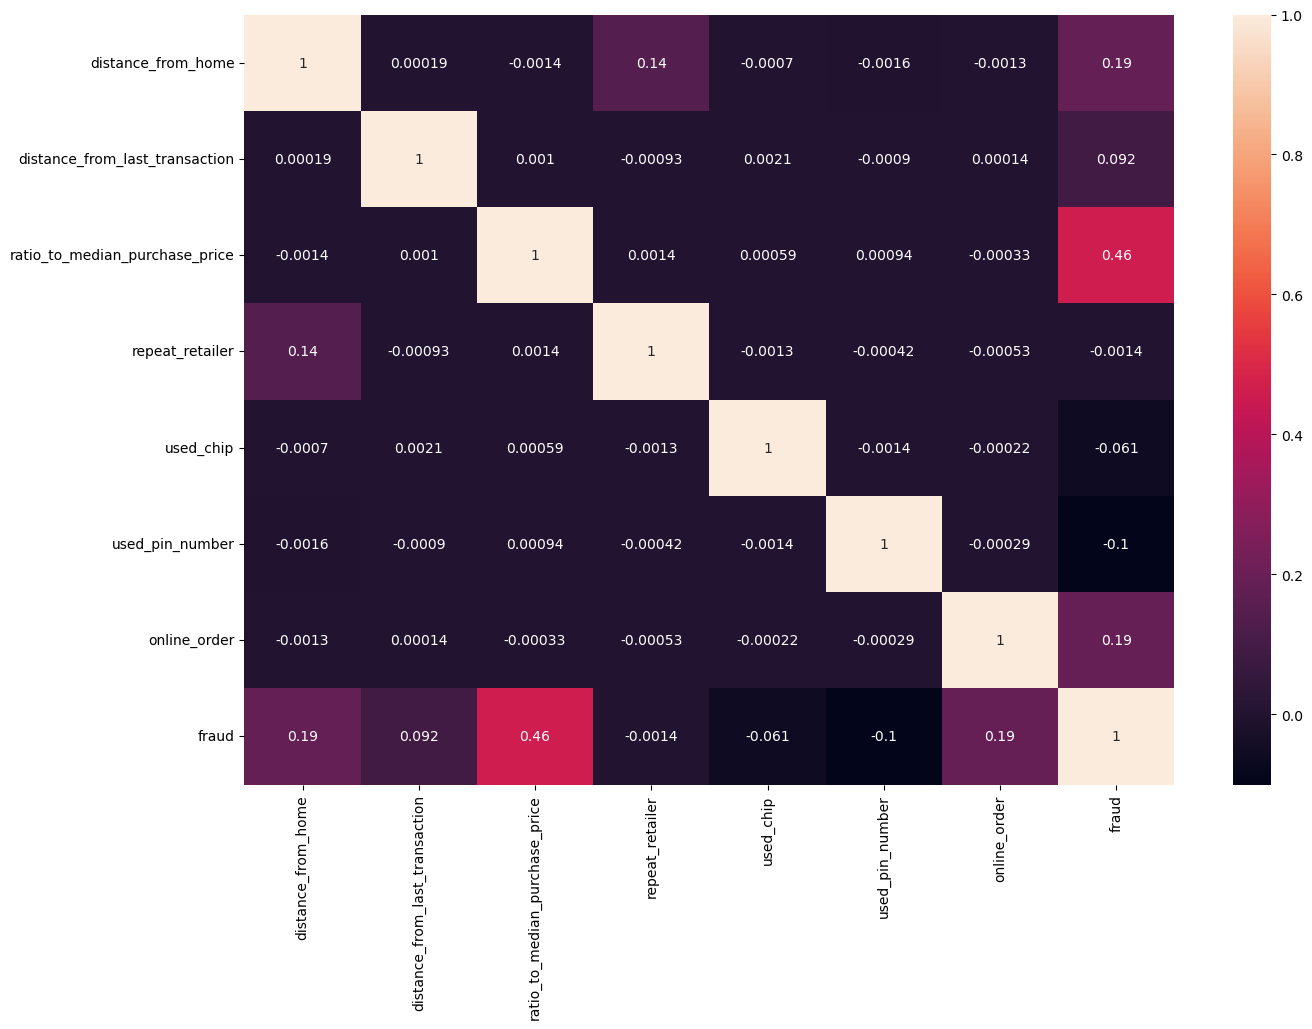

In [103]:
df_corr = df.corr()
sns.heatmap(df_corr, annot = True)